# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# cities=["London", "Oslo", "Lagos"]

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# query_url = f"{base_url}appid={api_key}&units={units}&q="

# Build partial query URL
# query_url = f"{url}appid={api_key}&units={units}&q="

# http://api.openweathermap.org/geo/1.0/direct?q={city name}&limit=5&appid={API key}



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
#     print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()            
#         print (city)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]                     # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]                   # YOUR CODE HERE
        city_max_temp = city_weather["main"]['temp_max']      # YOUR CODE HERE
        city_humidity = city_weather["main"]['humidity']       # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]        # YOUR CODE HERE
        city_wind =  city_weather["wind"]["speed"]         # YOUR CODE HERE
        city_country = city_weather["sys"]["country"]          # YOUR CODE HERE
        city_date =  city_weather["dt"]                             # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
#         print(city_data)
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | port blair
Processing Record 3 of Set 1 | nabire
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | salalah
Processing Record 7 of Set 1 | labuhan
Processing Record 8 of Set 1 | sorland
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | guerrero negro
Processing Record 15 of Set 1 | khash
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | tosya
Processing Record 19 of Set 1 | puerto escondido
Processing Record 20 of Set 1 | hambantota
Processing Record 21 of Set 1 | mackay
Processing Record 22 of Set 1 | riyadh
Processing

Processing Record 39 of Set 4 | port hedland
Processing Record 40 of Set 4 | galesong
Processing Record 41 of Set 4 | chillicothe
Processing Record 42 of Set 4 | vostok
Processing Record 43 of Set 4 | castries
Processing Record 44 of Set 4 | alamosa
Processing Record 45 of Set 4 | caala
Processing Record 46 of Set 4 | spencer
Processing Record 47 of Set 4 | alyangula
Processing Record 48 of Set 4 | madang
Processing Record 49 of Set 4 | faya
Processing Record 0 of Set 5 | avarua
Processing Record 1 of Set 5 | deputatskiy
Processing Record 2 of Set 5 | jamestown
Processing Record 3 of Set 5 | forestville
Processing Record 4 of Set 5 | samusu
City not found. Skipping...
Processing Record 5 of Set 5 | santa catalina
Processing Record 6 of Set 5 | redlands
Processing Record 7 of Set 5 | kruisfontein
Processing Record 8 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 5 | bougouni
Processing Record 10 of Set 5 | adre
Processing Record 11 of Set 5 | shingu
Proces

Processing Record 26 of Set 8 | izumo
Processing Record 27 of Set 8 | poole
Processing Record 28 of Set 8 | bogale
Processing Record 29 of Set 8 | carahue
Processing Record 30 of Set 8 | longyearbyen
Processing Record 31 of Set 8 | cessnock
Processing Record 32 of Set 8 | havelock
Processing Record 33 of Set 8 | bedford
Processing Record 34 of Set 8 | kibaya
Processing Record 35 of Set 8 | onguday
Processing Record 36 of Set 8 | half moon bay
Processing Record 37 of Set 8 | cidreira
Processing Record 38 of Set 8 | peleduy
Processing Record 39 of Set 8 | xadani
City not found. Skipping...
Processing Record 40 of Set 8 | berdigestyakh
Processing Record 41 of Set 8 | batagay
Processing Record 42 of Set 8 | novyy urengoy
Processing Record 43 of Set 8 | zhoucun
Processing Record 44 of Set 8 | jinxi
Processing Record 45 of Set 8 | karla
Processing Record 46 of Set 8 | whitefish
Processing Record 47 of Set 8 | evensk
Processing Record 48 of Set 8 | van
Processing Record 49 of Set 8 | mushie
P

Processing Record 17 of Set 12 | santa eulalia del rio
City not found. Skipping...
Processing Record 18 of Set 12 | kupang
Processing Record 19 of Set 12 | conceicao do araguaia
Processing Record 20 of Set 12 | suntar
Processing Record 21 of Set 12 | raudeberg
Processing Record 22 of Set 12 | lufilufi
Processing Record 23 of Set 12 | marzuq
Processing Record 24 of Set 12 | mongomo
Processing Record 25 of Set 12 | adeje
Processing Record 26 of Set 12 | tautira
Processing Record 27 of Set 12 | vysokogornyy
Processing Record 28 of Set 12 | viedma
Processing Record 29 of Set 12 | ipixuna
Processing Record 30 of Set 12 | abu samrah
Processing Record 31 of Set 12 | vodnany
Processing Record 32 of Set 12 | tankhoy
Processing Record 33 of Set 12 | camacupa
Processing Record 34 of Set 12 | baillif
Processing Record 35 of Set 12 | sagae
Processing Record 36 of Set 12 | pyaozerskiy
Processing Record 37 of Set 12 | dombarovskiy
Processing Record 38 of Set 12 | vuktyl
Processing Record 39 of Set 12

In [9]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df =  pd.DataFrame(city_data)


city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,-6.21,66,98,3.10,GL,1670195892
1,port blair,11.6667,92.7500,28.02,83,40,3.60,IN,1670195893
2,nabire,-3.3667,135.4833,26.17,80,98,1.63,ID,1670195893
3,tuktoyaktuk,69.4541,-133.0374,-26.00,76,20,5.66,CA,1670195893
4,kapaa,22.0752,-159.3190,28.18,70,40,5.66,US,1670195894
...,...,...,...,...,...,...,...,...,...
557,los llanos de aridane,28.6585,-17.9182,18.86,95,75,9.26,ES,1670196108
558,flinders,-34.5833,150.8552,27.25,68,4,3.36,AU,1670196109
559,san pedro,14.3500,121.0167,26.57,87,75,1.54,PH,1670196109
560,aswan,24.0934,32.9070,15.61,51,0,2.06,EG,1670196109


In [10]:
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,-6.21,66,98,3.10,GL,1670195892
1,port blair,11.6667,92.7500,28.02,83,40,3.60,IN,1670195893
2,nabire,-3.3667,135.4833,26.17,80,98,1.63,ID,1670195893
3,tuktoyaktuk,69.4541,-133.0374,-26.00,76,20,5.66,CA,1670195893
4,kapaa,22.0752,-159.3190,28.18,70,40,5.66,US,1670195894


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,upernavik,72.7868,-56.1549,-6.21,66,98,3.10,GL,1670195892
1,port blair,11.6667,92.7500,28.02,83,40,3.60,IN,1670195893
2,nabire,-3.3667,135.4833,26.17,80,98,1.63,ID,1670195893
3,tuktoyaktuk,69.4541,-133.0374,-26.00,76,20,5.66,CA,1670195893
4,kapaa,22.0752,-159.3190,28.18,70,40,5.66,US,1670195894


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

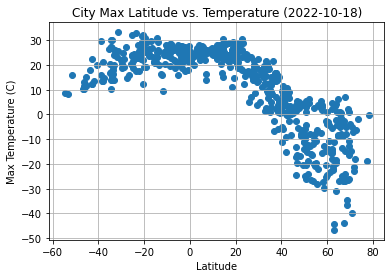

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = "o")   # YOUR CODE HERE
# Incorporate the other graph properties|# Add labels and title to plot
plt.xlabel("Latitude")                                                      # YOUR CODE HERE
plt.ylabel("Max Temperature (C)")
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')        

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

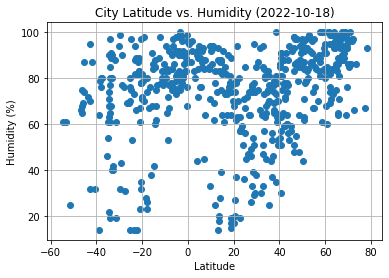

In [32]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = "o")   # YOUR CODE HERE

# Incorporate the other graph properties|# Add labels and title to plot
plt.xlabel("Latitude")                                                      # YOUR CODE HERE
plt.ylabel("Humidity (%)")
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')        

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

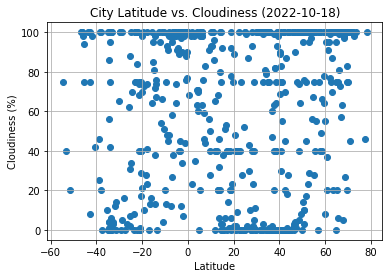

In [33]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = "o")   # YOUR CODE HERE

# Incorporate the other graph properties|# Add labels and title to plot
plt.xlabel("Latitude")                                                      # YOUR CODE HERE
plt.ylabel("Cloudiness (%)")
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')        

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

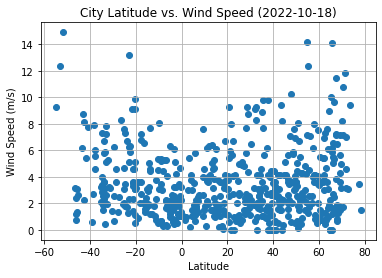

In [34]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = "o")   # YOUR CODE HERE

# Incorporate the other graph properties|# Add labels and title to plot
plt.xlabel("Latitude")                                                      # YOUR CODE HERE
plt.ylabel("Wind Speed (m/s)")
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')        


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
#     plt.savefig('fig.png')
    plt.show()

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]      # YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,upernavik,72.7868,-56.1549,-6.21,66,98,3.10,GL,1670195892
1,port blair,11.6667,92.7500,28.02,83,40,3.60,IN,1670195893
3,tuktoyaktuk,69.4541,-133.0374,-26.00,76,20,5.66,CA,1670195893
4,kapaa,22.0752,-159.3190,28.18,70,40,5.66,US,1670195894
5,salalah,17.0151,54.0924,24.05,73,40,1.03,OM,1670195894


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]    # YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nabire,-3.3667,135.4833,26.17,80,98,1.63,ID,1670195893
6,labuhan,-6.8844,112.2051,26.15,84,95,2.25,ID,1670195895
8,rikitea,-23.1203,-134.9692,24.05,82,75,6.26,PF,1670195868
14,hobart,-42.8794,147.3294,12.37,95,75,8.75,AU,1670195703
19,mackay,-21.1500,149.2000,29.27,67,0,1.43,AU,1670195791


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8408226998510239


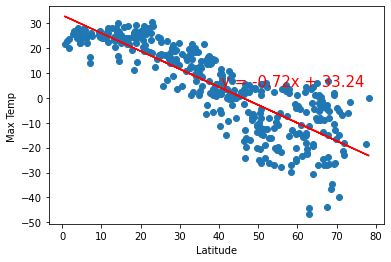

None


In [54]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]    # YOUR CODE HERE
y_values = northern_hemi_df["Max Temp"]
plt.ylabel("Max Temp ")
# Save the figure
plt.savefig("output_data/Fig5.png")
print(linear_reg_plot(x_values,y_values))



The r-squared is: 0.5011067212207537


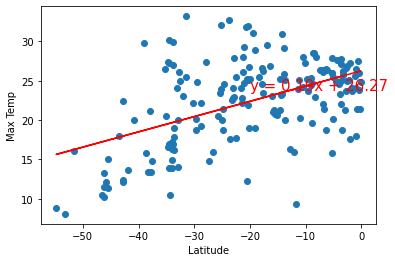

None


In [46]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]    # YOUR CODE HERE
y_values = southern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
# plt.savefig("output_data/Fig6.png")
print(linear_reg_plot(x_values,y_values))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.34314884552569536


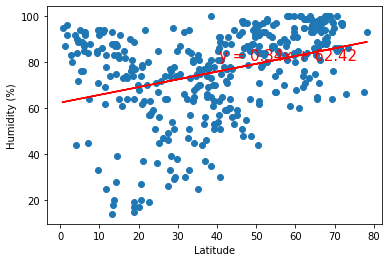

None


In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]    # YOUR CODE HERE
y_values = northern_hemi_df["Humidity"]
plt.ylabel("Humidity (%)")
# plt.savefig("output_data/Fig7.png")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.37482454410253485


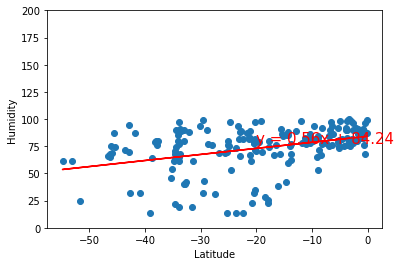

None


In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]     # YOUR CODE HERE
y_values = southern_hemi_df["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity")
# plt.savefig("output_data/Fig8.png")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** 

Temperature vs. Latitude Linear Regression Plot
-----------------------------------------------
The slope of the regression line is -0.72 (-ve slope) for Northern Hemisphere; the lower the latitude, the higher the temperature in the Northern Hemisphere.
It also reveals 84% variability in the the temperature based latitude and the remaining 16% is resulted from other factors not captured in the linear regression.

The slope of the regression line is +0.19, (+ve slope) for the Southern Hemisphere; the higher the latitude, the higher the temperature in the Southern Hemisphere.
It also reveals 50% variability in the the temperature based latitude and the remaining 50% is resulted from other factors not captured in the linear regression.

Humidity vs. Latitude Linear Regression Plot
-----------------------------------------------
The slope of the regression line is +0.34, (+ve slope) for the Northern Hemisphere; the higher the latitude, the higher the % humidity in the Northern Hemisphere.
It also reveals 34% variability in the the temperature based latitude and the remaining 66% is resulted from other factors not captured in the linear regression.

The slope of the regression line is +0.56, (+ve slope) for Southern Hemisphere; the higher the latitude, the higher the % humidity in the Southern Hemisphere.
It also reveals 37% variability in the the temperature based latitude and the remaining 63% is resulted from other factors not captured in the linear regression.



### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.26942990864166755


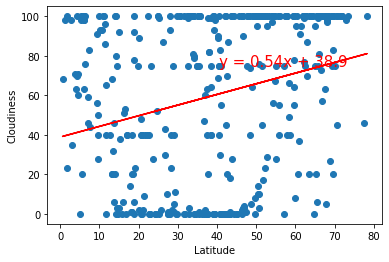

None


In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]    # YOUR CODE HERE
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
# plt.savefig("output_data/Fig9.png")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.24902491756801895


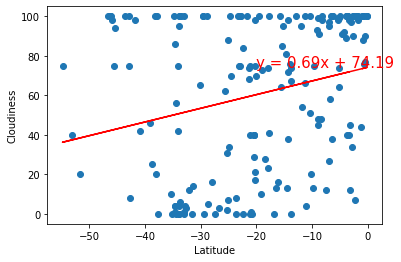

None


In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]    # YOUR CODE HERE
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
# plt.savefig("output_data/Fig10.png")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.19869131944468246


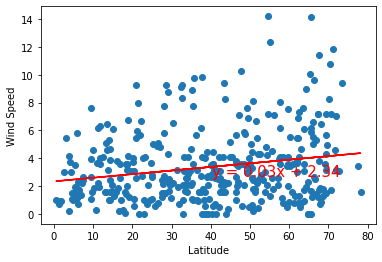

None


In [43]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]    # YOUR CODE HERE
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
# plt.savefig("output_data/Fig11.png")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.3654897001987738


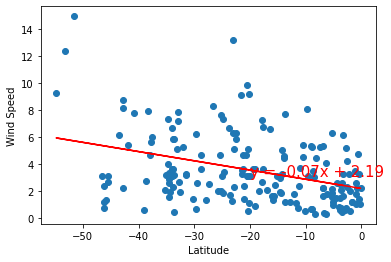

None


In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]    # YOUR CODE HERE
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
# plt.savefig("output_data/Fig12.png")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** 

Cloudiness vs. Latitude Linear Regression Plot
-----------------------------------------------
The slopes of the regression lines are 0.54 and 0.69 in the Northern and Southern Hemisphere respectively (+ slopes),
showing that the higher  the latitude, the higher the cloudiness, with 29% and 24% variability based on latitudes respectively.


Wind Speed vs. Latitude Linear Regression Plot
-----------------------------------------------
The slope of the regression line are 0.03 (+ve slope); the wind speed increases as the latitude increases for the Northern Hemisphere with 18% variability 
wind speed as the latitude increases, leaving the remaining 82% to other factors not captured in the linear regression. 

The slope of the regression line are -0.07 (-ve slope); the wind speed increases as the latitude decreases for the Southern Hemisphere with 36% variability 
wind speed as the latitude increases, leaving the remaining 64% to other factors not captured in the linear regression. 

Conclusion
-------------------
Based on the the above analysis, Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere.